## Read the dataset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
path = r"C:\Users\admin\Documents\Sindhura\LMS Basic Python and DA\datasets\Cars93.csv"

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(path,na_values=["","NA"],keep_default_na=False)
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


## Perform basic data quality checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [7]:
s= df.isna().sum()
s[s>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [8]:
df.duplicated().sum()

0

## Drop insignificant columns like id 

In [9]:
df = df.drop(columns="id")

## Separate X and Y features
    X : independent
    Y: Weight

In [10]:
X = df.drop(columns="Weight")
Y = df[["Weight"]]

In [11]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [12]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


## Data Preprocessing

#### Separate categorical and continuous features

In [13]:
cat = list(X.columns[X.dtypes=="object"])
con = list(X.columns[X.dtypes!="object"])

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [15]:
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy="most_frequent")),
                           ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [16]:
con_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

In [17]:
pre = ColumnTransformer([('num_pipe',con_pipe,con),
                         ('cat_pipe',cat_pipe,cat)]).set_output(transform='pandas')

In [18]:
pre

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Min.Price', 'Price', 'Max.Price', 'MPG.city',
                                  'MPG.highway', 'EngineSize', 'Horsepower',
                                  'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
                                  'Passengers', 'Length', 'Wheelbase', 'Width',
                                  'Turn.circle', 'Rear.seat.room',
                                  'Luggage.room']),
                                ('cat_pipe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Manufacturer', 'Model', 'Type', 'AirBags',
                                  'DriveTrain', 'Cylinders', 'Man.trans.avail',
                                  'Origin', 'Make'])])

In [19]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num_pipe__Min.Price,num_pipe__Price,num_pipe__Max.Price,num_pipe__MPG.city,num_pipe__MPG.highway,num_pipe__EngineSize,num_pipe__Horsepower,num_pipe__RPM,num_pipe__Rev.per.mile,num_pipe__Fuel.tank.capacity,...,cat_pipe__Make_Toyota Camry,cat_pipe__Make_Toyota Celica,cat_pipe__Make_Toyota Previa,cat_pipe__Make_Toyota Tercel,cat_pipe__Make_Volkswagen Corrado,cat_pipe__Make_Volkswagen Eurovan,cat_pipe__Make_Volkswagen Fox,cat_pipe__Make_Volkswagen Passat,cat_pipe__Make_Volvo 240,cat_pipe__Make_Volvo 850
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train Test Split
    Divide the data into training data and testing data
    dataset => 70%-80% training ... 20%-30% testing
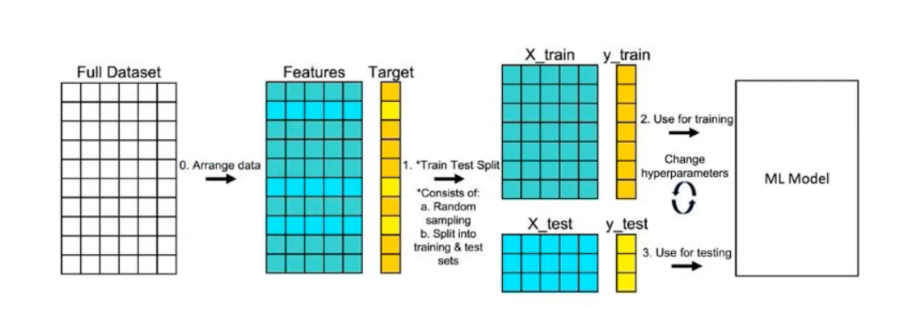
train_size = 0.8,test_size=0.2

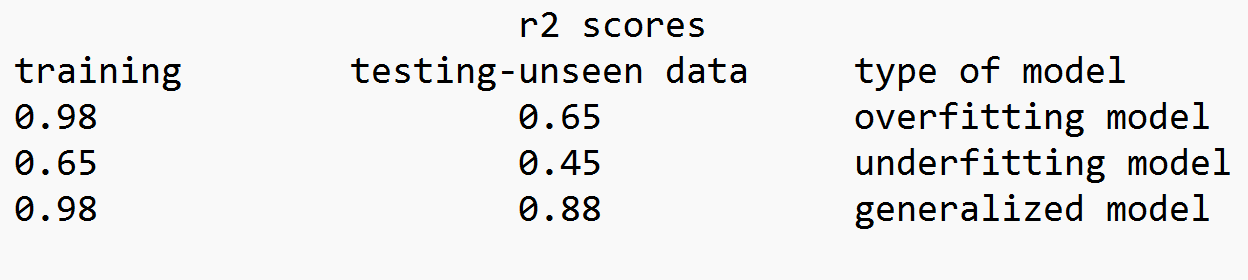

In [21]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.8,test_size=0.2,random_state=21)
# by default, data splitting happens randomly

In [32]:
xtrain.head()

,num_pipe__Min.Price,num_pipe__Price,num_pipe__Max.Price,num_pipe__MPG.city,num_pipe__MPG.highway,num_pipe__EngineSize,num_pipe__Horsepower,num_pipe__RPM,num_pipe__Rev.per.mile,num_pipe__Fuel.tank.capacity,...,cat_pipe__Make_Toyota Camry,cat_pipe__Make_Toyota Celica,cat_pipe__Make_Toyota Previa,cat_pipe__Make_Toyota Tercel,cat_pipe__Make_Volkswagen Corrado,cat_pipe__Make_Volkswagen Eurovan,cat_pipe__Make_Volkswagen Fox,cat_pipe__Make_Volkswagen Passat,cat_pipe__Make_Volvo 240,cat_pipe__Make_Volvo 850
57,1.365026,1.289670,1.185041,-0.423219,-0.016221,-0.356418,-0.265452,-0.304365,0.187910,-0.663618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,-1.003095,-0.979424,-0.911397,0.113500,0.172352,-0.841022,-0.323043,2.054464,0.157535,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.606307,0.685966,0.729294,-0.781032,-0.959087,0.322027,1.116716,1.212025,-0.247462,0.716035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.043016,-0.021825,-0.063707,-0.423219,-0.204794,0.806631,1.347077,0.875050,-0.713210,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,1.985795,1.726835,1.449374,-0.781032,-0.581941,1.872759,1.270290,-1.146804,-0.996708,1.022624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
xtest.head()

,num_pipe__Min.Price,num_pipe__Price,num_pipe__Max.Price,num_pipe__MPG.city,num_pipe__MPG.highway,num_pipe__EngineSize,num_pipe__Horsepower,num_pipe__RPM,num_pipe__Rev.per.mile,num_pipe__Fuel.tank.capacity,...,cat_pipe__Make_Toyota Camry,cat_pipe__Make_Toyota Celica,cat_pipe__Make_Toyota Previa,cat_pipe__Make_Toyota Tercel,cat_pipe__Make_Volkswagen Corrado,cat_pipe__Make_Volkswagen Eurovan,cat_pipe__Make_Volkswagen Fox,cat_pipe__Make_Volkswagen Passat,cat_pipe__Make_Volvo 240,cat_pipe__Make_Volvo 850
23,-1.003095,-0.854520,-0.701753,0.113500,-0.016221,-0.453339,-0.975733,-0.809828,0.532158,-0.816912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,0.203957,0.332071,0.428500,-0.781032,-1.336233,-0.259498,-0.111878,-0.472853,0.370159,0.961306,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.537333,0.332071,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21,1.422504,1.039862,0.692834,-0.423219,-0.581941,0.612789,0.060893,-0.809828,-1.108083,-0.203734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.100495,-0.073868,-0.209546,-0.959938,-0.581941,2.260442,0.502419,-1.820755,-1.988953,1.942392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [35]:
ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910


## Model Building

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [37]:
model.score(xtrain,ytrain)

1.0

In [38]:
model.score(xtest,ytest)

0.9330070791251123

## Training and Testing scores are greater than 80%. We can consider this model for out of sample predictions

## Out of sample predictions

In [39]:
path2 = r"C:\Users\admin\Documents\Sindhura\LMS Basic Python and DA\datasets\sample_cars93.csv"

In [40]:
xnew = pd.read_csv(path2,na_values=["","NA"],keep_default_na=False)
xnew.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [41]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num_pipe__Min.Price,num_pipe__Price,num_pipe__Max.Price,num_pipe__MPG.city,num_pipe__MPG.highway,num_pipe__EngineSize,num_pipe__Horsepower,num_pipe__RPM,num_pipe__Rev.per.mile,num_pipe__Fuel.tank.capacity,...,cat_pipe__Make_Toyota Camry,cat_pipe__Make_Toyota Celica,cat_pipe__Make_Toyota Previa,cat_pipe__Make_Toyota Tercel,cat_pipe__Make_Volkswagen Corrado,cat_pipe__Make_Volkswagen Eurovan,cat_pipe__Make_Volkswagen Fox,cat_pipe__Make_Volkswagen Passat,cat_pipe__Make_Volvo 240,cat_pipe__Make_Volvo 850
0,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,-0.510323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.888138,-0.875337,-0.829362,0.113500,0.360925,-0.647181,-0.649388,-0.135877,0.673908,-0.449005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.428309,-0.375720,-0.318925,-0.244313,-0.016221,-0.453339,-0.649388,-0.135877,0.532158,-0.050439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.767376,1.352122,0.966282,-0.959938,-0.770514,-1.325626,2.134145,2.054464,-0.014589,1.022624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.968608,-1.083511,-1.130155,0.471312,0.738071,-0.841022,-1.206095,0.369586,0.441034,-1.307455,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [42]:
ypred_new = model.predict(xnew_pre)

In [43]:
ypred_new[:5]

array([[3335.17083283],
       [2575.        ],
       [3195.        ],
       [2895.        ],
       [2240.        ]])

## SAve the predictions to dataframe and then save it to a file

In [44]:
xnew["Weights"] = ypred_new
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make,Weights
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,6,190,106,65,37,31.0,17.0,non-USA,Audi 100,3335.170833
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird,2575.000000
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina,3195.000000
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7,2895.000000
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox,2240.000000


In [45]:
xnew = xnew.round()

In [46]:
xnew.to_csv("PipelineOutofPredictions.csv",index=False)